In [97]:
import sys
print("sys.executable:", sys.executable)
print("sys.version:", sys.version)
with open("the-verdict.txt","r",encoding="utf-8") as f:
    raw_text=f.read();
print("total number of characters:",len((raw_text)))
print(raw_text[:99])

sys.executable: /media/amruth/Drive/llm/myenv/bin/python
sys.version: 3.12.3 (main, Jun 18 2025, 17:59:45) [GCC 13.3.0]
total number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [98]:
#example 1)------------>
import re
text="Hello, world. This, is a test."
result=re.split(r'(\s)',text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [99]:
result=re.split(r'([,.]|\s)',text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [100]:
result =[item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [101]:
text="hello, world. Is this-- a test?"
result= re.split(r'([,.:;?_!"()\']|--|\s)',text)
result=[item for item in result if item.strip()]
print(result)
#example_end 1)------------------->

['hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [102]:
preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',raw_text)
preprocessed=[item for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [103]:
print(len(preprocessed))

4690


In [104]:
all_words=sorted(set(preprocessed))
vocab_size=len(all_words)

print(vocab_size) #no duplicates so len will be less than preprocessed

1130


In [105]:
vocab ={token:integer for integer,token in enumerate(all_words)}

In [106]:
for i,item in enumerate(vocab.items()):
    print(item)
    if i>=50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [107]:
class SimpleTokenizerV1:
    def __init__(self,vocab):
        self.str_to_int=vocab
        self.int_to_str={i:s for s,i in vocab.items()}
    def encode(self,text):
        preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)
        preprocessed=[item for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids;
    def decode(self,ids):
        text=" ".join([self.int_to_str[i] for i in ids])
        #replacing spacs before the specified punctuations
        text=re.sub(r'\s+([,.?!"()\'])',r'\1',text)
        return text

In [108]:
#example 2)-----------> start
tokenizer=SimpleTokenizerV1(vocab);
text=""""It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
ids=tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [109]:
tokenizer.decode(ids)
#example 2)---------------------> end

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [110]:
#adding special context tokens
all_tokens=sorted(list(set(preprocessed)))
all_tokens.extend(["<|extendoftext|>","<|unk|>"])

vocab={token:integer for integer,token in enumerate(all_tokens)}

In [111]:
len(vocab.items())

1132

In [112]:
#version 2 of tokenizer where we are replaceing unknown words in text to <|unk|> so that a number can be assigned to it encoder
class SimpleTokenizerV2:
    def __init__(self,vocab):
        self.str_to_int=vocab
        self.int_to_str={i:s for s,i in vocab.items()}
    def encode(self,text):
        preprocessed=re.split(r'([,.:;?_!"()\']|--|\s)',text)
        preprocessed=[item for item in preprocessed if item.strip()]
        preprocessed=[
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]
        ids=[self.str_to_int[s] for s in preprocessed]
        return ids;
    def decode(self,ids):
        text=" ".join([self.int_to_str[i] for i in ids])
        #replacing spacs before the specified punctuations
        text=re.sub(r'\s+([,.?!"()\'])',r'\1',text)
        return text

In [113]:
tokenizer=SimpleTokenizerV2(vocab)
text1="Hello, do you like tea?"
text2="In the sunlit terraces of the palace"

text=" <|endoftext|>".join((text1,text2))
print(text)

Hello, do you like tea? <|endoftext|>In the sunlit terraces of the palace


In [114]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1131, 988, 956, 984, 722, 988, 1131]

In [115]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|unk|> the sunlit terraces of the <|unk|>'

In [116]:
import importlib
import importlib.metadata
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.9.0


In [117]:
tokenizer=tiktoken.get_encoding("gpt2")

In [118]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    "of someunknownPlace"
)
integers = tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271]


In [119]:
strings =tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace


In [120]:
integers=tokenizer.encode("Akwirw ier")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


In [121]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
    raw_text=f.read()
enc_text=tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [122]:
enc_sample=enc_text[50:]
print(enc_sample)

[290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 22353, 13, 843, 340, 373, 407, 691, 262, 9074, 13, 536, 48819, 508, 25722, 276, 13, 11161, 407, 262, 40123, 18113, 544, 9325, 701, 11, 379, 262, 938, 402, 1617, 261, 12917, 905, 11, 5025, 502, 878, 402, 271, 10899, 338, 366, 31640, 12, 67, 20811, 1, 284, 910, 11, 351, 10

In [123]:
context_size=4 #length of the input 
#the model looks at 4 words and predicts next four words
x=enc_sample[:context_size]
y=enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [124]:
for i in range(1,context_size+1):
    context=enc_sample[:i]
    desired=enc_sample[i]

    print(context,"----->",desired)

[290] -----> 4920
[290, 4920] -----> 2241
[290, 4920, 2241] -----> 287
[290, 4920, 2241, 287] -----> 257


In [125]:
for i in range(1,context_size+1):
    context=enc_sample[:i]
    desired=enc_sample[i]

    print(tokenizer.decode(context),"----->",tokenizer.decode([desired]))

 and ----->  established
 and established ----->  himself
 and established himself ----->  in
 and established himself in ----->  a


In [126]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
   def __init__(self,txt,tokenizer,max_length,stride):
        self.input_ids=[]
        self.target_ids=[]
        
        token_ids=tokenizer.encode(txt,allowed_special={"<|endoftext|>"})
        
        for i in range(0,len(token_ids)-max_length,stride):
            input_chunk=token_ids[i:i+max_length]
            target_chunk=token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

   def __len__(self):
       return len(self.input_ids)

   def __getitem__(self,idx):
       return self.input_ids[idx],self.target_ids[idx]  

In [127]:
def create_dataloader_v1(txt,batch_size=4,max_length=256,stride=128,shuffle=True,drop_last=True,num_workers=0):

    tokenizer=tiktoken.get_encoding("gpt2")

    dataset=GPTDatasetV1(txt,tokenizer,max_length,stride)

    dataloader=DataLoader(
        dataset,batch_size=batch_size,shuffle=shuffle,drop_last=drop_last,num_workers=num_workers
    )

    return dataloader

In [128]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
    raw_text=f.read()

In [129]:
import torch
print("Pytorch version:",torch.__version__)
dataloader=create_dataloader_v1(
    raw_text,batch_size=1,max_length=4,stride=1,shuffle=False
)

data_iter=iter(dataloader)
first_batch=next(data_iter)
print(first_batch)

Pytorch version: 2.7.1+cu126
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [130]:
second_batch=next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [131]:
dataloader=create_dataloader_v1(raw_text,batch_size=8,max_length=4,stride=4,shuffle=False)

data_iter=iter(dataloader)
inputs,targets=next(data_iter)
print("Inputs:\n",inputs)
print("\nTargets:\n",targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [132]:
input_ids=torch.tensor([2,3,5,1])

In [133]:
vocab_size=6
output_dim=3
torch.manual_seed(123)
embedding_layer=torch.nn.Embedding(vocab_size,output_dim)

In [134]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [135]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [136]:
#--positional emberding
vocab_size=50257
output_dim=256

token_embedding_layer=torch.nn.Embedding(vocab_size,output_dim)
print(token_embedding_layer)

Embedding(50257, 256)


In [137]:
max_length=4
dataloader=create_dataloader_v1(
    raw_text,batch_size=8,max_length=max_length,
    stride=max_length,shuffle=False
)
data_iter=iter(dataloader)
inputs,targets=next(data_iter)

In [138]:
print("Token IDs:\n",inputs)
print("\nInputs shpae:\n",inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shpae:
 torch.Size([8, 4])


In [139]:
token_embeddings=token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [140]:
context_length=max_length
pos_embedding_layer=torch.nn.Embedding(context_length,output_dim)

In [141]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [142]:
input_embeddings=token_embeddings+pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


In [143]:
#simplified self attention mechanism
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

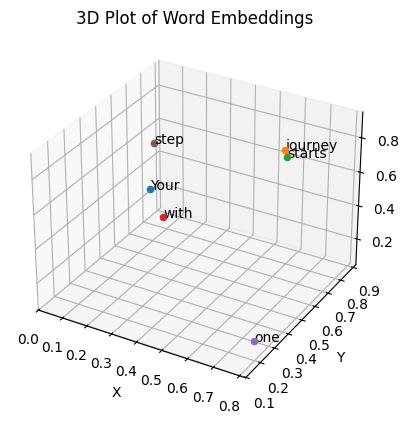

In [144]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

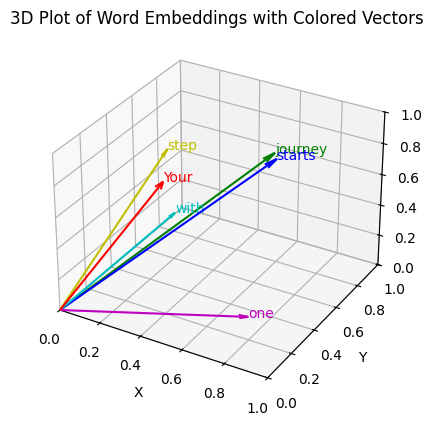

In [145]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [146]:
query=inputs[1]
attn_scores_2=torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
    attn_scores_2[i]=torch.dot(x_i,query)
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [147]:
att_scpre_normal=attn_scores_2/attn_scores_2.sum()
print("att weights:",att_scpre_normal)
print("sum:",att_scpre_normal.sum())

att weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
sum: tensor(1.0000)


In [148]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [149]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [150]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [151]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [152]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [153]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [154]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [155]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
